# Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

* The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.

* The trick, of course, comes in deciding which questions to ask at each step.

* In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.

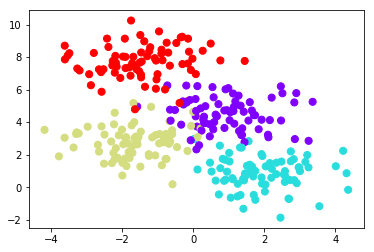

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300, centers=4, random_state=0,cluster_std=1.0) ## 2 features and 4 possible targets
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='rainbow')

In [3]:
X

array([[  2.45830537e-02,   2.96215652e+00],
       [ -1.52392631e+00,   7.12573205e+00],
       [  1.27450825e+00,   5.63017322e+00],
       [ -8.65523345e-01,   7.80121774e+00],
       [  7.48740670e-01,   2.55579434e+00],
       [  4.35918422e+00,  -1.62352163e-01],
       [ -1.99576820e+00,   7.16440976e-01],
       [  1.70536064e+00,   4.43277024e+00],
       [  4.90616903e-01,   8.82985441e+00],
       [ -3.52995502e-01,   9.21042408e+00],
       [ -1.83601846e+00,   2.68441560e+00],
       [ -3.61784268e+00,   8.69951232e+00],
       [  1.42013331e+00,   4.63746165e+00],
       [ -2.88089030e+00,   6.26769229e+00],
       [  1.05505217e+00,  -6.47107437e-01],
       [  1.05472929e-01,   3.72493766e+00],
       [  1.13121750e+00,   4.68194985e+00],
       [  2.91209813e+00,   2.46638067e-01],
       [ -7.60240832e-01,   3.27417508e+00],
       [ -7.79715679e-01,   1.72893731e+00],
       [  3.15492712e+00,   1.55292739e+00],
       [  1.59167155e+00,   1.37914513e+00],
       [  

In [4]:
X.shape

(300, 2)

In [5]:
X[:,0].shape

(300,)

In [6]:
X[:,0] ## The reverse of new axis 

array([ 0.02458305, -1.52392631,  1.27450825, -0.86552334,  0.74874067,
        4.35918422, -1.9957682 ,  1.70536064,  0.4906169 , -0.3529955 ,
       -1.83601846, -3.61784268,  1.42013331, -2.8808903 ,  1.05505217,
        0.10547293,  1.1312175 ,  2.91209813, -0.76024083, -0.77971568,
        3.15492712,  1.59167155,  0.57309313, -2.30953317, -2.17919761,
       -1.57671974,  1.45895348,  0.340424  , -3.78246824, -0.33963733,
       -0.02338521, -2.5961812 ,  2.47034915, -1.05318608, -1.90831209,
       -3.20005988, -2.52794495, -3.53687581, -2.65372982,  1.40285894,
        0.46546494, -2.29104794, -0.73000011,  1.92352205, -1.81874138,
       -0.68527275, -1.46520534, -1.56907546, -1.6329012 ,  1.94472686,
       -2.23160429,  2.7216506 , -0.65837595,  1.45795145,  1.55723507,
       -0.83313086,  0.76300091, -0.88358955, -2.17841228,  0.95088418,
       -2.92947399,  0.30193742, -1.75107248, -0.71238419, -2.49800858,
       -0.95961374, -3.2646624 ,  2.57915855, -3.61242959, -1.47

### Creating a decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
tree = DecisionTreeClassifier().fit(X,y)

In [8]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    return Z

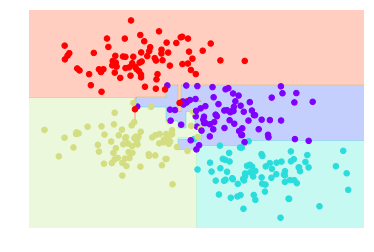

In [9]:
Z = visualize_classifier(DecisionTreeClassifier(),X,y)

In [10]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  For detailed documentation, see `r_`.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from AxisConcatenator:
 |  
 |  __

### Over-fitting is a general property of decision tree, on increasing depth

# Ensembles of estimators : Random Forests

* Multiple overfitting estimators can be combined to reduce the effect of overfitting.
* Random Forest - Ensembling random decision trees to create random forest

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ..., 
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

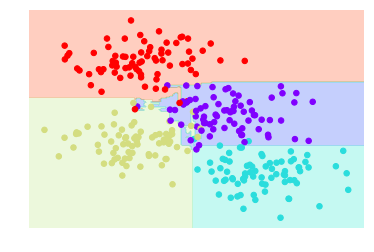

In [11]:
## Using bagging classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X,y)
visualize_classifier(bag,X,y)

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ..., 
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

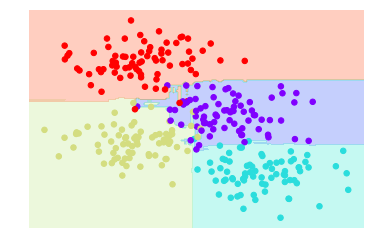

In [12]:
## Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1)
visualize_classifier(model,X,y)